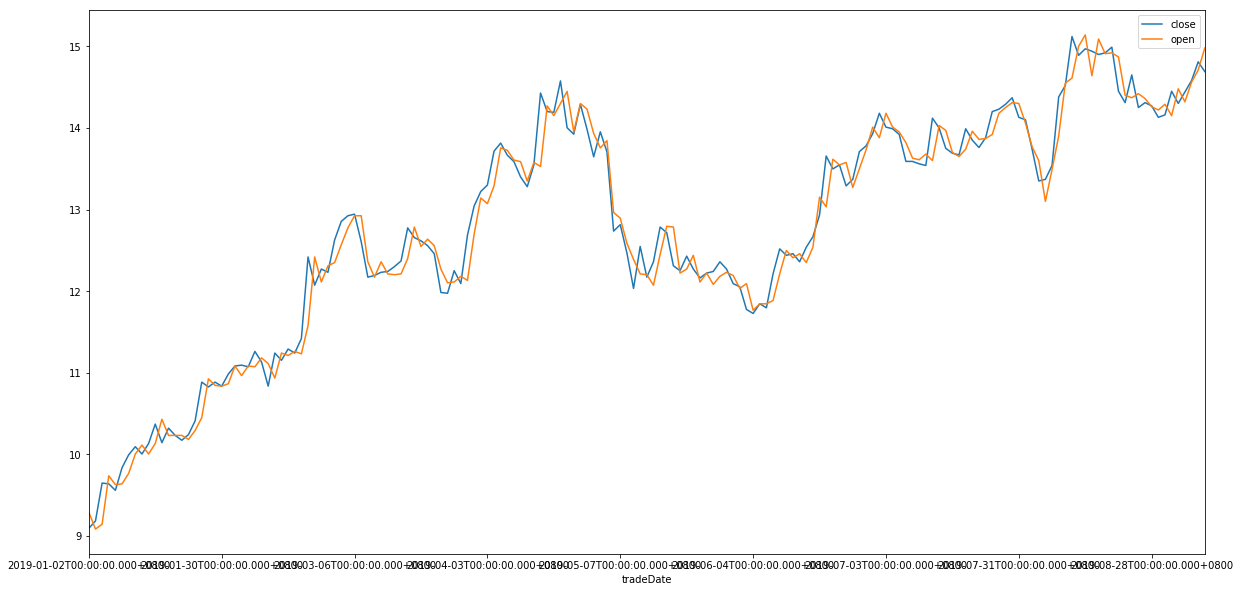

In [4]:
import mysqlx
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

tsCode='000001.SZ'

connection_string = {
    'host': 'localhost',
    'port': 33160,
    'user': 'stock',
    'password': 'aRmbZH9dx9k6TzRB'
}
client_options = {
    'pooling': {
        "max_size": 10,
        "max_idle_time": 30000
    }
}
client = mysqlx.get_client(connection_string, client_options)


session = client.get_session()
schemaList = session.get_schemas()

schema = session.get_schema('stock')

col = schema.get_collection('stock_x_split_adjusted_daily')

docs = col.find("tsCode = :tscode and tradeDate >= '2019-01-01'" ).bind('tscode',tsCode).execute()

session.close()
client.close()

dailyDatas = docs.fetch_all()

variables = dailyDatas[0].keys()
df = pd.DataFrame([[getattr(i,j) for j in variables] for i in dailyDatas], columns = variables)

axes = df.plot.line(y=['close','open'],x='tradeDate',figsize=(20,10))

